In [6]:
import pandas as pd
import json
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [7]:
pd_ori=pd.read_csv('all.csv')

In [8]:
pd_ori

Unnamed: 0  user_id  product_id  label  rating date_review  \
0                0     5044           0      1     1.0  2014-11-16   
1                1     5045           0      1     1.0  2014-09-08   
2                2     5046           0      1     3.0  2013-10-06   
3                3     5047           0      1     5.0  2014-11-30   
4                4     5048           0      1     5.0  2014-08-28   
...            ...      ...         ...    ...     ...         ...   
608593      608593   119664        5039      0     4.0  2013-01-20   
608594      608594    56277        5039      0     2.0  2012-11-12   
608595      608595   265320        5039      0     1.0  2012-08-22   
608596      608596   161722        5039      0     4.0  2011-05-11   
608597      608597    78454        5039      0     4.0  2010-07-17   

                                                   review  
0       Drinks were bad, the hot chocolate was watered...  
1       This was the worst experience I've ever had a ...  
2       This is located on the site of the old Spruce ...  
3       I enjoyed coffee and breakfast twice at Toast ...  
4       I love Toast! The food choices are fantastic -...  
...                                                   ...  
608593  When I first moved to the area I must say I wa...  
608594  Kind of pricey. I guess I expected a ridiculou...  
608595  Stopped by this restaurant yesterday, we just ...  
608596  Finally checked out The Best Subs in Claremont...  
608597  Just got me some "Best Subs" and I gotta say, ...  

[608598 rows x 7 columns]

In [9]:
nlp = spacy.load('en_core_web_sm')
tokenizer = RegexpTokenizer(r'\w+')
def tokenizer(text):
    return tokenizer.tokenize(text)
  


In [10]:
def remove_stopwords(review):
    all_word = []
    for sentence in tqdm(review):
        all_word_list = []
        for token in sentence:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                all_word_list.append(token)
        all_word.append(" ".join(all_word_list))    
        
    return all_word

In [11]:
pd_ori

Unnamed: 0  user_id  product_id  label  rating date_review  \
0                0     5044           0      1     1.0  2014-11-16   
1                1     5045           0      1     1.0  2014-09-08   
2                2     5046           0      1     3.0  2013-10-06   
3                3     5047           0      1     5.0  2014-11-30   
4                4     5048           0      1     5.0  2014-08-28   
...            ...      ...         ...    ...     ...         ...   
608593      608593   119664        5039      0     4.0  2013-01-20   
608594      608594    56277        5039      0     2.0  2012-11-12   
608595      608595   265320        5039      0     1.0  2012-08-22   
608596      608596   161722        5039      0     4.0  2011-05-11   
608597      608597    78454        5039      0     4.0  2010-07-17   

                                                   review  
0       Drinks were bad, the hot chocolate was watered...  
1       This was the worst experience I've ever had a ...  
2       This is located on the site of the old Spruce ...  
3       I enjoyed coffee and breakfast twice at Toast ...  
4       I love Toast! The food choices are fantastic -...  
...                                                   ...  
608593  When I first moved to the area I must say I wa...  
608594  Kind of pricey. I guess I expected a ridiculou...  
608595  Stopped by this restaurant yesterday, we just ...  
608596  Finally checked out The Best Subs in Claremont...  
608597  Just got me some "Best Subs" and I gotta say, ...  

[608598 rows x 7 columns]

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(pd_ori, pd_ori['label']):
    strat_train_set=pd_ori.iloc[train_index]
    strat_test_set=pd_ori.iloc[test_index]
strat_test_set['label'].value_counts()/len(strat_test_set)

0    0.867787
1    0.132213
Name: label, dtype: float64

In [13]:
strat_train_set.reset_index(inplace=True)

In [14]:
strat_test_set.reset_index(inplace=True)

In [15]:
strat_train_set


index  Unnamed: 0  user_id  product_id  label  rating date_review  \
0       349337      349337     7155        3044      0     4.0  2013-03-11   
1       448380      448380    15868        3806      0     3.0  2010-08-22   
2       229140      229140    74732        1905      0     2.0  2013-02-21   
3       471511      471511   109028        3899      0     5.0  2010-01-07   
4       292393      292393    99863        1250      0     5.0  2014-01-06   
...        ...         ...      ...         ...    ...     ...         ...   
486873  460939      460939    59926        3875      0     4.0  2013-11-09   
486874  392385      392385    12658        3314      0     5.0  2010-12-21   
486875  189210      189210   118784          56      0     4.0  2013-09-30   
486876  573720      573720    17220        4757      1     2.0  2014-11-26   
486877  521821      521821    46499        4358      0     4.0  2014-01-03   

                                                   review  
0       Authentic Japanese home style cooking is embod...  
1       Took kids here for world tour of NYC restauran...  
2       This restaurant left me wanting more food. I e...  
3       It's like eating in some women's attic that yo...  
4       Best food truck in NYC forget the rest!!! Don'...  
...                                                   ...  
486873                                               =)\n  
486874  Mmmmmm. Every other NY pizza gets compared to ...  
486875  Don't know what you want to eat? Have a divers...  
486876  I went here with my mom and we went to order a...  
486877  Visited on New Year's Eve. Beer was on target ...  

[486878 rows x 8 columns]

In [16]:
train_review=strat_train_set['review'].tolist()
test_review=strat_test_set['review'].tolist()
train_spam=strat_train_set['label'].tolist()
test_spam=strat_test_set['label'].tolist()

In [17]:
from nltk.tokenize import RegexpTokenizer
rest_tokenizer = RegexpTokenizer(r'\w+')
def tokenizer(text):
    return rest_tokenizer.tokenize(text)

In [18]:

def result_evalation(predict_result, true_result):
    print("accuracy:", accuracy_score(true_result, predict_result))
    print("precision:", precision_score(true_result, predict_result))
    print("recall:", recall_score(true_result, predict_result))
    print("f1:", f1_score(true_result, predict_result))


In [19]:
# random classifier
probability=len(strat_test_set[strat_test_set['label']==1])/len(strat_test_set)
random_test_result=[]
for i in range(len(test_review)):
    random_test_result.append(np.random.binomial(1,probability,1)[0])
result_evalation(random_test_result,test_spam)

accuracy: 0.7722888596779494
precision: 0.1367045880735092
recall: 0.13589759522773878
f1: 0.13629989716743013


In [20]:
from sklearn.metrics import roc_auc_score
print( roc_auc_score(random_test_result, test_spam) )

0.502585471615688


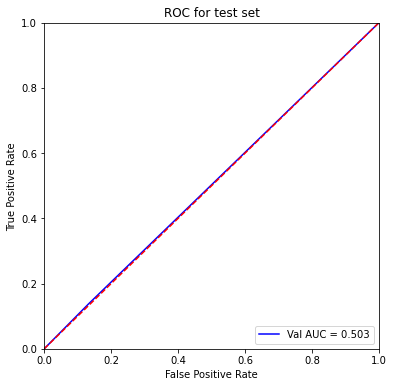

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
fpr, tpr, threshold = metrics.roc_curve(random_test_result, test_spam)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC for test set')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [22]:
tokenized_review=[]
for i in range(len(pd_ori)):
    tokenized_review.append(tokenizer(pd_ori['review'][i]))
tokenized_review_new=remove_stopwords(tokenized_review)

100%|██████████| 608598/608598 [00:47<00:00, 12680.86it/s]


In [24]:
tokenized_review_new

['Drinks bad hot chocolate watered latte burnt taste food poor quality service worst cashier rude',
 'worst experience ve casual coffee light fare place server disappeared 20 minutes talking friend window girlfriend sat dumbfounded dude nerve job trying eye contact clearly getting paid talk bud important girlfriend went counter server disappeared 5 minutes guy asked order food girl counter gives weird look says ll server arrive look table laugh Yeah leaving hanging half goddamn hour place customers funny retrospect collective incompetence false sense entitlement certainly food okay place called toast d figured bread better cold Le Bus Additionally m 95 sure andouille special link pre packaged offering Trader Joe s cut pieces 9 unapologetic mediocrity happening Avoid place like plague didn t leave tip honestly shouldn t felt buyer s remorse day disgrace',
 'located site old Spruce St Video mild cofee good pastris great times service slow busy times patrons receive complimentary mimosa d

In [51]:
pd_ori['tokenize']=tokenized_review_new

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(pd_ori, pd_ori['label']):
    strat_train_set=pd_ori.iloc[train_index]
    strat_test_set=pd_ori.iloc[test_index]
strat_test_set['label'].value_counts()/len(strat_test_set)

0    0.867787
1    0.132213
Name: label, dtype: float64

In [53]:
strat_train_set.reset_index(inplace=True)
strat_test_set.reset_index(inplace=True)

In [54]:
# Bayes classifier
train_word_is_spam=[]
train_word_is_not_spam=[]
train_spam=strat_train_set['label'].tolist()
train_review_no_punc=strat_train_set['tokenize'].tolist()
test_spam=strat_test_set['label'].tolist()
test_review_no_punc=strat_test_set['tokenize'].tolist()

In [55]:
for i in range(len(strat_train_set)):
    if int(train_spam[i])==0:
        train_word_is_not_spam.extend(tokenizer(train_review_no_punc[i]))
    else:
        train_word_is_spam.extend(tokenizer(train_review_no_punc[i]))

In [56]:
train_word_size=len(set(train_word_is_not_spam+train_word_is_spam))

In [57]:
train_word_size

203479

In [24]:
p_y1=train_spam.count(1) / len(train_spam)
p_y0=train_spam.count(0) / len(train_spam)

In [25]:
from collections import Counter
train_review_word_counts_not_spam=Counter(train_word_is_not_spam)

In [26]:
train_review_word_counts_spam=Counter(train_word_is_spam)

In [27]:
def train(y_j,
          x_i,
          smoothing_alpha=1):

    smoothing_additive = smoothing_alpha * train_word_size
    if int(y_j) == 0:
        try:
            return (train_review_word_counts_not_spam[x_i] + smoothing_alpha
                ) / (len(train_word_is_not_spam) + smoothing_additive)
        except:
            return (( smoothing_alpha
                ) / (len(train_word_is_not_spam) + smoothing_additive))
            
    if int(y_j) == 1:
        try :
            return (train_review_word_counts_spam[x_i] + smoothing_alpha) / (
            len(train_word_is_spam) + smoothing_additive)
        except:
            return (  smoothing_alpha) / (
            len(train_word_is_spam) + smoothing_additive)

In [28]:
def classify(word_list,smoothing_alpha):
    word_seperated=tokenizer(word_list)
    word_seperated_no_stop=word_seperated
    #for word in word_seperated:
     #   if word not in STOP_WORDS:
      #      word_seperated_no_stop.append(word)
    p_x_y0=np.log(p_y0)
   # print(p_x_y0)
    p_x_y1=np.log(p_y1)
   # print(p_x_y1)
    for i in range(len(word_seperated_no_stop)):
        temp1=train(0,word_seperated_no_stop[i],smoothing_alpha)
        #print(temp1)
        temp2=train(1,word_seperated_no_stop[i],smoothing_alpha)
        #print(temp2)
        if temp1==0 and temp2!=0:
            #print("yes")
            return 1
        if temp2==0 and temp1!=0:
            #print("no")
            return 0
        if temp1!=0 and temp2!=0:
            p_x_y0=p_x_y0+np.log(temp1)
            p_x_y1=p_x_y1+np.log(temp2)
        if temp1==0 and temp2==0:
            # both numerators are 0
            return np.random.binomial(1,probability,1)[0]
    if(p_x_y0>p_x_y1):
        return 0
    else:
        return 1
   

In [29]:
predict_result_test=[]
for smoothing_alpha in [1]:
    for i in range(len(test_review_no_punc)):
        temp=classify(test_review_no_punc[i],smoothing_alpha)
        predict_result_test.append(temp)


In [30]:
result_evalation(predict_result_test,test_spam)

accuracy: 0.8094396976667763
precision: 0.29345044206607723
recall: 0.3134903374137824
f1: 0.30313955235090884


In [31]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(predict_result_test, test_spam))

0.5938781369981389


In [32]:
print(roc_auc_score(predict_result_test, test_spam))

0.5938781369981389


In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt



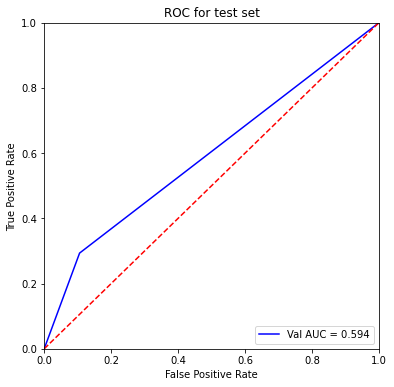

In [34]:
fpr, tpr, threshold = metrics.roc_curve(predict_result_test, test_spam)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('ROC for test set')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
